<a href="https://colab.research.google.com/github/AndrewXu23/Buffalo-Urban-Forest-Info-Website/blob/main/CovidAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv('Covid-19-3.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(3710, 15)
['Data as of', 'Start Date', 'End Date', 'State', 'Race', 'RaceInInt', 'CountOfDeaths', 'DistributionOfdeaths(%)', 'HighDeathRate', 'UWPopDistribution(%)', 'WPopDistribution(%)', 'COVID-19&UWPopDiff(%)', 'COVID-19&WPopDiff(%)', 'AgeGroup', 'AgeInInt']


In [ ]:
data.head()

,Data as of,Start Date,End Date,State,Race,RaceInInt,CountOfDeaths,DistributionOfdeaths(%),HighDeathRate,UWPopDistribution(%),WPopDistribution(%),COVID-19&UWPopDiff(%),COVID-19&WPopDiff(%),AgeGroup,AgeInInt
0,10/19/2022,1/1/2020,10/15/2022,United States,Non-Hispanic White,1,691593.0,65.2,1,59.7,40.9,5.5,24.3,"All ages, unadjusted",45
1,10/19/2022,1/1/2020,10/15/2022,United States,Non-Hispanic Black,2,149182.0,14.1,1,12.6,13.5,1.5,0.6,"All ages, unadjusted",45
2,10/19/2022,1/1/2020,10/15/2022,United States,Non-Hispanic American Indian or Alaska Native,3,11538.0,1.1,0,0.7,0.4,0.4,0.7,"All ages, unadjusted",45
3,10/19/2022,1/1/2020,10/15/2022,United States,Non-Hispanic Asian,4,33156.0,3.1,0,5.9,9.6,-2.8,-6.5,"All ages, unadjusted",45
4,10/19/2022,1/1/2020,10/15/2022,United States,Non-Hispanic Native Hawaiian or Other Pacific ...,5,2221.0,0.2,0,0.2,0.2,0.0,0.0,"All ages, unadjusted",45


In [ ]:
data['Race'].unique()

array(['Non-Hispanic White', 'Non-Hispanic Black',
       'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Hispanic', 'Other'], dtype=object)

In [ ]:
data['RaceInInt'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
data['AgeGroup'].unique()

array(['All ages, unadjusted', '35-44 years', '45-54 years',
       '55-64 years', '75-84 years', '85 years and over', '65-74 years',
       '25-34 years', '0-24 years', 'All ages, standardized'],
      dtype=object)

In [ ]:
data['AgeInInt'].unique()

array([45, 40, 50, 60, 80, 90, 70, 30, 12])

In [ ]:
data['HighDeathRate'].value_counts()

0    2626
1    1084
Name: HighDeathRate, dtype: int64

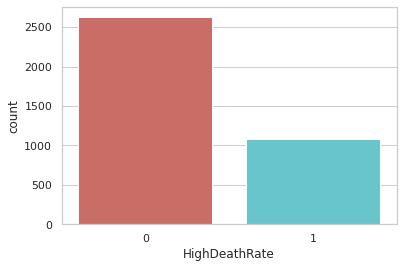

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='HighDeathRate',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.groupby('HighDeathRate').mean()

,RaceInInt,CountOfDeaths,DistributionOfdeaths(%),UWPopDistribution(%),WPopDistribution(%),COVID-19&UWPopDiff(%),COVID-19&WPopDiff(%),AgeInInt
HighDeathRate,,,,,,,,
0,4.619573,123.822087,1.306702,2.665194,3.097144,-0.254265,-0.606321,52.701828
1,2.499077,3726.033487,42.744557,42.429889,41.388745,0.314668,1.355812,50.984317


In [ ]:
data.groupby('Race').mean()

,RaceInInt,CountOfDeaths,DistributionOfdeaths(%),HighDeathRate,UWPopDistribution(%),WPopDistribution(%),COVID-19&UWPopDiff(%),COVID-19&WPopDiff(%),AgeInInt
Race,,,,,,,,,
Hispanic,6.0,1297.718302,12.893019,0.418868,10.808868,12.378679,3.000755,1.519811,52.2
Non-Hispanic American Indian or Alaska Native,3.0,89.318113,2.871698,0.094340,1.348491,0.801132,1.791132,2.239811,52.2
Non-Hispanic Asian,4.0,256.320566,2.366981,0.043396,4.524340,5.746415,-1.227736,-2.183585,52.2
Non-Hispanic Black,2.0,1165.069811,14.900943,0.505660,10.650000,13.892264,4.729245,1.668491,52.2
Non-Hispanic Native Hawaiian or Other Pacific Islander,5.0,16.438113,0.681698,0.016981,0.297736,0.312075,0.450943,0.444340,52.2
Non-Hispanic White,1.0,5356.151509,59.326226,0.952830,70.298491,64.773208,-8.992830,-3.530755,52.2
Other,7.0,53.280000,0.858491,0.013208,2.058491,2.093396,-0.367736,-0.389245,52.2


In [ ]:
data.groupby('AgeGroup').mean()

,RaceInInt,CountOfDeaths,DistributionOfdeaths(%),HighDeathRate,UWPopDistribution(%),WPopDistribution(%),COVID-19&UWPopDiff(%),COVID-19&WPopDiff(%),AgeInInt
AgeGroup,,,,,,,,,
0-24 years,4.0,19.345013,9.472776,0.245283,14.285714,14.287601,-0.866038,-0.626146,12.0
25-34 years,4.0,62.024259,11.889757,0.312668,14.282749,14.285714,-0.241779,-0.140701,30.0
35-44 years,4.0,154.471698,13.589757,0.345013,14.282749,14.286253,0.114555,0.219407,40.0
45-54 years,4.0,370.501348,13.972237,0.339623,14.284636,14.284097,0.040970,0.115094,50.0
55-64 years,4.0,822.681941,14.150674,0.320755,14.284367,14.283827,0.020755,0.046361,60.0
65-74 years,4.0,1299.102426,14.208895,0.283019,14.285445,14.285984,0.018329,0.025067,70.0
75-84 years,4.0,1479.692722,14.198922,0.245283,14.284906,14.287062,0.016442,0.020216,80.0
85 years and over,4.0,1500.514825,14.211051,0.218329,14.281671,14.281402,0.053100,0.040701,90.0
"All ages, standardized",4.0,338.550135,14.174933,0.339623,14.282480,14.286792,-0.074933,-0.077089,45.0


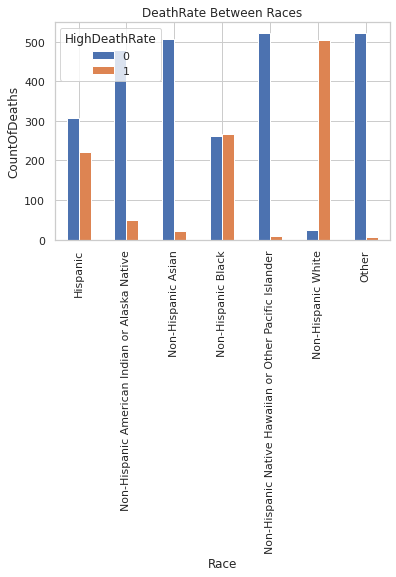

In [ ]:
%matplotlib inline
pd.crosstab(data.Race,data.HighDeathRate).plot(kind='bar')
plt.title('DeathRate Between Races')
plt.xlabel('Race')
plt.ylabel('CountOfDeaths')
plt.savefig('DthRate_Race_RIP')

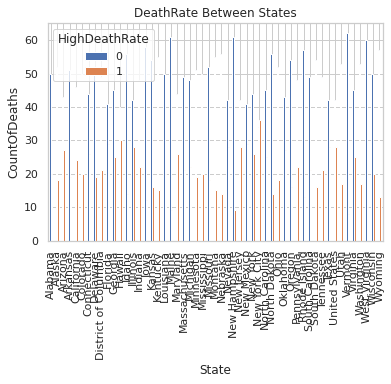

In [ ]:
%matplotlib inline
pd.crosstab(data.State,data.HighDeathRate).plot(kind='bar')
plt.title('DeathRate Between States')
plt.xlabel('State')
plt.ylabel('CountOfDeaths')
plt.savefig('DthRate_States_RIP')

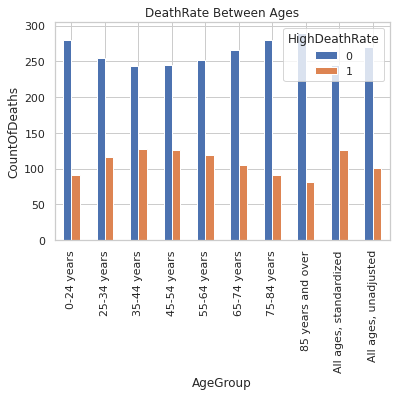

In [ ]:
%matplotlib inline
pd.crosstab(data.AgeGroup,data.HighDeathRate).plot(kind='bar')
plt.title('DeathRate Between Ages')
plt.xlabel('AgeGroup')
plt.ylabel('CountOfDeaths')
plt.savefig('DthRate_Age_RIP')

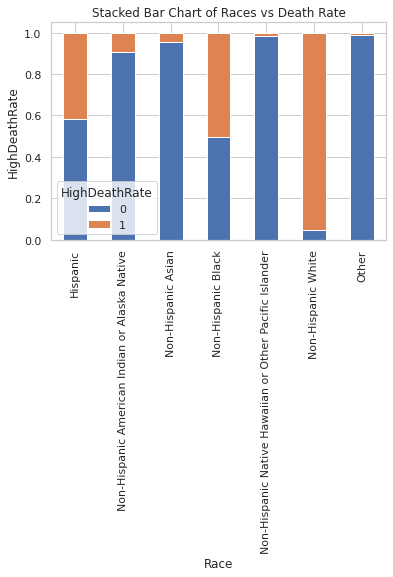

In [ ]:
table=pd.crosstab(data.Race,data.HighDeathRate)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Races vs Death Rate')
plt.xlabel('Race')
plt.ylabel('HighDeathRate')
plt.savefig('Race_vs_DthRate_RIP')

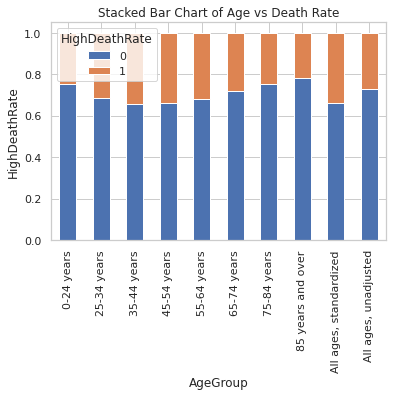

In [136]:
table=pd.crosstab(data.AgeGroup,data.HighDeathRate)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Death Rate')
plt.xlabel('AgeGroup')
plt.ylabel('HighDeathRate')
plt.savefig('Age_vs_DthRate_RIP')

In [137]:
cat_vars=['State','Race','RaceInInt','CountOfDeaths','DistributionOfdeaths(%)','HighDeathRate','UWPopDistribution(%)',
          'WPopDistribution(%)','COVID-19&UWPopDiff(%)','COVID-19&WPopDiff(%)','AgeGroup','AgeInInt']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [138]:
cat_vars=['State','Race','RaceInInt','CountOfDeaths','DistributionOfdeaths(%)','HighDeathRate','UWPopDistribution(%)',
          'WPopDistribution(%)','COVID-19&UWPopDiff(%)','COVID-19&WPopDiff(%)','AgeGroup','AgeInInt']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [165]:
data_final=data[to_keep]
data_final.columns.values

array(['Data as of', 'Start Date', 'End Date', ..., 'AgeInInt_70',
       'AgeInInt_80', 'AgeInInt_90'], dtype=object)

In [156]:
data_final_vars=data_final.columns.values.tolist()
y= ['HighDeathRate']
X=[i for i in data_final_vars if i not in y]